In [2]:
import cv2
import yaml
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from copy import deepcopy

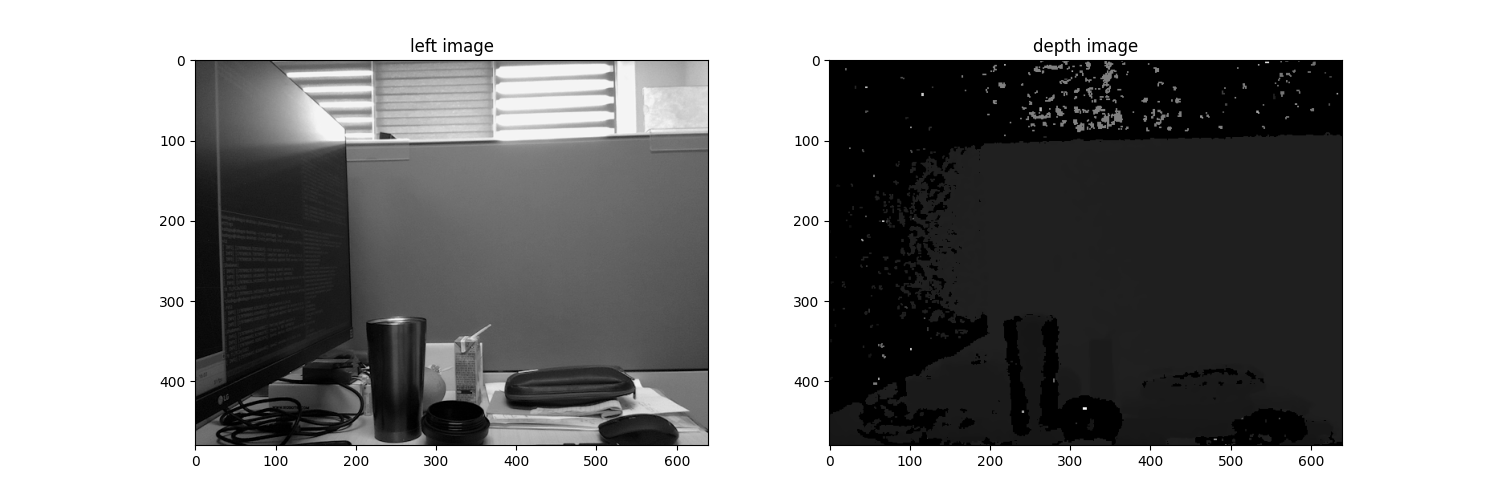

In [10]:
# Image read
left_image = cv2.imread('color_frames/color_image484.png', cv2.IMREAD_GRAYSCALE)
left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
depth_image = cv2.imread('depth_frames/depth_image213.png', cv2.IMREAD_ANYDEPTH)

# YAML file read
yaml_filename = "/home/kodogyu/kimera_multi_ws/src/kimera_vio/params/L515_stereo/LeftCameraParams.yaml"
with open(yaml_filename, "r") as stream:
    stream.readline()  # %YAML:1.0 건너뛰기
    yaml_data = yaml.safe_load(stream)

# Confirm
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(left_image)
axs[0].set_title("left image")
axs[1].imshow(depth_image, cmap='gray')
axs[1].set_title("depth image")
plt.show()

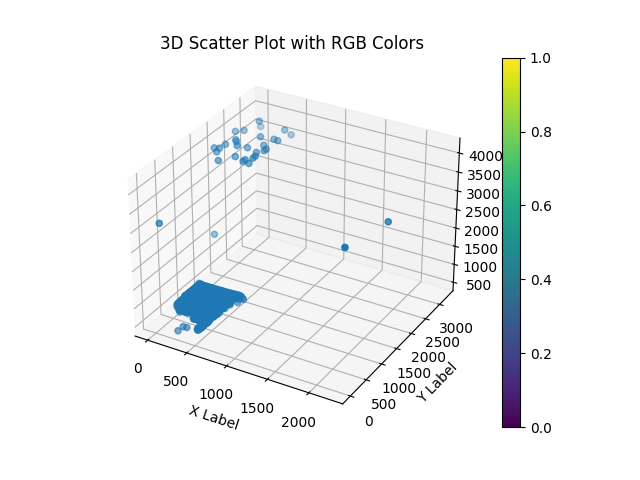

In [11]:
fx, fy, cx, cy = yaml_data["intrinsics"]

points_3d = []
point_idx = 0
for row in range(0, left_image.shape[0], 10):
    for col in range(0, left_image.shape[1], 10):
        # point_vector = np.array([row - cy, col - cx, fx])
        point_vector = np.array([row, col, fx])
        point_vector = point_vector / fx
        depth = depth_image[row, col]
        if depth:
            points_3d.append(list(point_vector * depth))

points_3d = np.array(points_3d)
points_x = points_3d[:, 0]
points_y = points_3d[:, 1]
points_z = points_3d[:, 2]

# 3D scatter plot 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(points_x, points_y, points_z)

# colorbar 추가
plt.colorbar(scatter)

# 플롯 축 레이블 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 플롯 제목 설정
plt.title('3D Scatter Plot with RGB Colors')

plt.show()